# Introducción a librerías de manipulación de datos
A través de este tutorial conocerás algunas de las funcionalidades de la librería Pandas, una de las herramientas más importantes para la exploración y manipulación de un conjunto de datos, así como librerías de visualización de datos como Matplotlib y Seaborn. Particularmente, veremos cómo realizar los siguientes procesos:
1. Importar las librerías necesarias. 
2. Cargar un conjunto de datos. 
3. Describir o perfilar los datos mediante estadística descriptiva.
4. Manipular el conjunto de datos: filtrar, extraer filas y columnas.
5. Visualizar variables a través de diferentes tipos de gráficos.

El conjunto de datos que utilizaremos corresponde a la caracterización de casas y su precio. Con estos datos podemos, por ejemplo, descubrir una relación entre el área construida, el número de habitaciones, el año de construcción y el precio del inmueble.




## 1. Importación de librerías requeridas

Iniciaremos importando las librerias básicas: Pandas, Matplotlib y Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carga de datos

Pandas permite la lectura de fuentes de datos almacenadas en archivos con varios formatos. Entre los formatos más comunes para el almacenamiento de conjuntos de datos se encuentran los archivos de valores separados por comas (CSV) y JavaScript Object Notation (JSON). 
Para este tutorial usaremos un conjunto de datos en formato CSV, que leeremos utilizando la función de Pandas `read_csv()`. Para que pueda ser leído por Pandas, tenemos que especificar la ruta en la que está almacenado nuestro archivo fuente.

**Nota:** En este caso, el conjunto de datos se encuentra en una carpeta `data`, que a su vez se encuentra en el mismo directorio que este Notebook. En tu caso, puedes cambiar la ruta de acuerdo con la localización de tus archivos en tu entorno.

In [2]:
data = pd.read_csv('./data/kc_house_data.csv')

Pandas transforma el archivo original en un DataFrame, una estructura de datos de dos dimensiones en la que cada dato está representado con una fila, mientras que cada variable está contenida en una columna. Un DataFrame permite guardar datos de distintos tipos, como caracteres o números de punto flotante. 

Para ver algunos de los datos de nuestro conjunto, utilizamos la función `head()` que, por defecto, muestra las primeras 5 filas del DataFrame: 

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Además, podemos conocer el tamaño de los datos usando `data.shape`:

In [4]:
data.shape

(21613, 21)

## 3. Descripción de los datos

Una de las formas más sencillas de obtener una descripción de los datos es mediante la función `describe()`, que retorna algunas medidas estadísticas como la media, la desviación estándar, el mínimo y el máximo de los valores para cada variable. 

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Adicionalmente, para una variable, podemos obtener la cantidad de apariciones de cada valor usando la función `value_counts()`. En este caso, veremos la cantidad de casas que hay por año de construcción en nuestro conjunto de datos:

In [6]:
data['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

## 4. Consulta y modificación de datos

Muchas veces es necesario consultar algún dato en particular, o extraer una variable del conjunto de datos. Para esto, podemos utilizar algunas de las funciones de Pandas que nos permiten filtrar el DataFrame y obtener subconjuntos según nuestras necesidades.

### Selección de filas

Pandas ofrece localización por índices, `data.iloc[]`, para seleccionar filas utilizando su posición en el DataFrame (que varía desde 0 hasta n-1, siendo n el número de filas). Por ejemplo, seleccionaremos el dato 101, que tiene índice 100:


In [7]:
data.iloc[100]

id                    1952200240
date             20140611T000000
price                     850830
bedrooms                       3
bathrooms                    2.5
sqft_living                 2070
sqft_lot                   13241
floors                       1.5
waterfront                     0
view                           0
condition                      5
grade                          9
sqft_above                  1270
sqft_basement                800
yr_built                    1910
yr_renovated                   0
zipcode                    98102
lat                      47.6415
long                    -122.315
sqft_living15               2200
sqft_lot15                  4500
Name: 100, dtype: object

Igualmente, podemos utilizar el operador `:` para extraer un subconjunto de filas de nuestros datos. En este caso, si tenemos un intervalo `n:m`, el resultado incluye el dato `n`, pero excluye el dato `m`:

In [8]:
data.iloc[10:20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
11,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
12,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
13,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
14,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
16,1875500060,20140731T000000,395000.0,3,2.00,1890,14040,2.0,0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
17,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
18,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
19,7983200060,20150424T000000,230000.0,3,1.00,1250,9774,1.0,0,0,...,7,1250,0,1969,0,98003,47.3343,-122.306,1280,8850


### Selección de columnas

Por otro lado, utilizaremos la localización por etiquetas, `data.loc[]`, para obtener columnas (variables) de nuestro conjunto de datos. En este código, el operador `:` indica que queremos todas las filas, mientras que el String (o cadena de caracteres) `'price'` es el nombre de la columna de interés:

In [9]:
data.loc[:,'price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

También podemos utilizar la localización por índices, aunque es menos explícito:

In [10]:
data.iloc[:, 2]

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

Para seleccionar múltiples columnas podemos usar un arreglo de etiquetas en vez de una sola etiqueta:

In [11]:
data.loc[:,['price', 'sqft_living']]

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


### Condicionales y filtros

Pandas permite evaluar condicionales para un conjunto de datos utilizando cualquiera de los tipos de localización. En este caso, utilizaremos la localización por etiquetas y compararemos el resultado con un valor. Por ejemplo, evaluaremos si cada casa tiene un precio mayor a 500,000 dólares:

In [12]:
data.loc[:,'price'] > 500000

0        False
1         True
2        False
3         True
4         True
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: price, Length: 21613, dtype: bool

El resultado es una lista o un DataFrame con valores booleanos. En este caso, se tiene una lista de 21,613 posiciones con valores verdaderos o falsos. Esta evaluación nos permite filtrar el DataFrame, colocando la linea de código anterior dentro de una localización por etiquetas:

In [13]:
data.loc[data.loc[:,'price'] > 500000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21599,7202300110,20140915T000000,810000.0,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21600,249000205,20141015T000000,1537000.0,5,3.75,4470,8088,2.0,0,0,...,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023


## 5. Visualización de datos

Podemos generar gráficos que nos permitan entender un poco mejor la naturaleza de nuestros datos. 

### Matplotlib

Inicialmente vamos a crear una gráfica para observar la distribución de años de construcción en nuestro conjunto de datos. Esta gráfica se crea de la siguiente forma:

* `figure()`: crea un nuevo gráfico, el argumento `figsize` se utiliza para modificar su tamaño, usando valores en pulgadas para cada dimensión. Recuerda que la estructura básica que representa un gráfico es la "figura".
* `bar()`: especifica que se trata de una gráfica de barras, y la dibuja sobre la figura usando los datos de la variable `x` y de la variable `y`.
* `title()`: añade un título al gráfico.
* `xticks()`: modifica las etiquetas del eje x. En este caso, rotamos las etiquetas 90°.

**Nota:** `% matplotlib inline` es un llamado a una función que permite que las gráficas se muestren correctamente en Jupyter Notebooks. Si en algún momento no aparecen tus gráficas, puedes regresar a esta celda, ejecutarla nuevamente y volver al punto en el que estabas.

In [14]:
%matplotlib inline

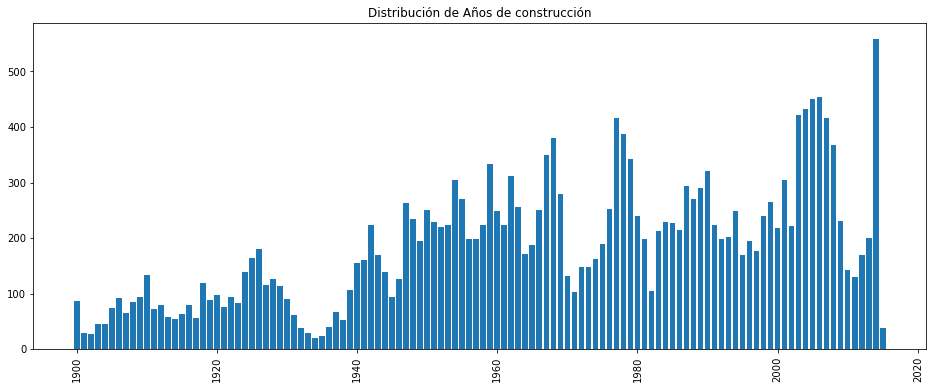

In [15]:
plt.figure(figsize=(16,6))

# Retorna una serie con la cantidad de apariciones de cada valor
plot_data = data['yr_built'].value_counts()

# Retorna todos los valores únicos que puede tomar la variable yr_built
x = plot_data.index
# Retorna las veces que cada valor aparece en los datos
y = plot_data.values
plt.bar(x,y)

plt.title('Distribución de Años de construcción')
plt.xticks(rotation=90)

plt.show()

Adicionalmente podemos crear histogramas, gráficas que representan la frecuencia de variables con valores numéricos en un intervalo continuo. Para esto, utilizamos la función `hist()`, especificando la variable y el número de intervalos (con el argumento `bins`):

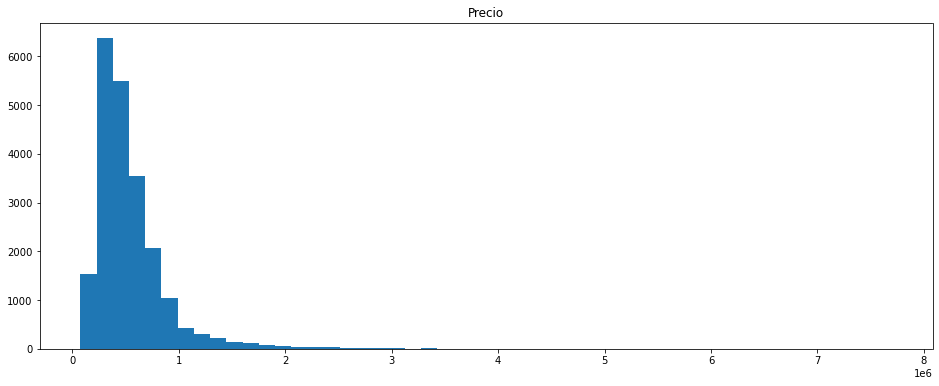

In [16]:
plt.figure(figsize=(16,6))

# En este caso utilizamos directamente el DataFrame
# Sin embargo, "x" también puede ser una consulta con localización por índices o etiquetas
x = data['price']

plt.hist(x, bins=50)
plt.title('Precio')  
plt.show()

Otra gráfica disponible es la de líneas o puntos, que podemos utilizar para observar relaciones entre variables. En este caso, observaremos la relación entre el área social de las casas y su precio. Es importante resaltar que `plot()` está recibiendo los siguientes argumentos:

* `data['sqft_living']`: datos del eje x.
* `data['price']`: datos del eje y.
* `'.'`: formato de los puntos. Algunos de los formatos válidos pueden ser `'*'` para estrellas o `'o'` para círculos.
* `color='blue'`: color de los puntos.

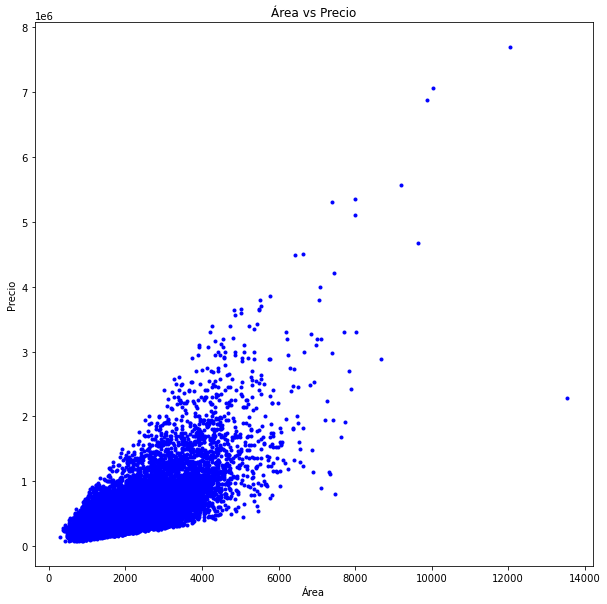

In [17]:
plt.figure(figsize=(10,10))

x = data['sqft_living']
y = data['price']

plt.plot(x, y, '.', color='blue')
plt.title('Área vs Precio')
plt.xlabel('Área')  
plt.ylabel('Precio')  
plt.show()

### Seaborn

Otra librería para visualización es Seaborn, con la que podemos realizar los mismos tipos de gráficos. Por ejemplo, utilizamos `distplot()` para crear el mismo histograma de los precios, usando los siguientes argumentos:

* `data['price']`: datos del eje x.
* `kde=True`: este parámetro computa un estimado de la distribución de la variable, que se verá como una curva sobre el histograma.

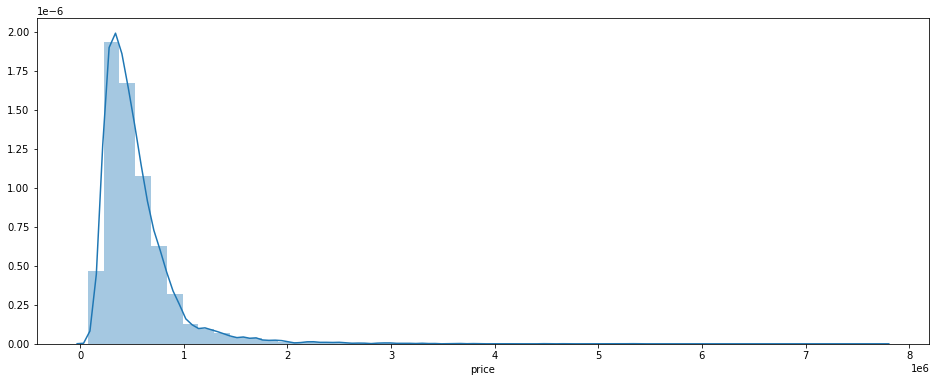

In [18]:
plt.figure(figsize=(16,6))
plt.tight_layout()

x = data['price']

sns.distplot(x, kde=True)

Incluso, podemos visualizar las relaciones que hay entre variables, para saber si hay variables que dependen de otras. Para esto, podemos hacer uso de un mapa de calor (con la función `heatmap()`), calculando las correlaciones de nuestro DataFrame usando `data.corr()`:

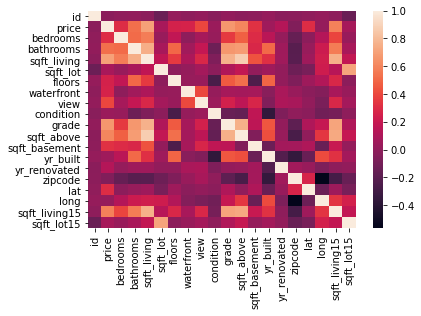

In [19]:
sns.heatmap(data.corr())

El resultado muestra con colores qué tan relacionada está una variable. En este caso, entre más claro sea el color, más relacionadas están las variables de la fila y columna correspondientes.

## Cierre

En este tutorial hemos utilizado algunas de las funcionalidades básicas de Pandas para explorar, analizar y consultar un conjunto de datos, además de crear visualizaciones simples de nuestros datos mediante Matplotlib y Seaborn. Estas librerías constituyen la base para el entendimiento de los datos, el paso más importante en la construcción de modelos de aprendizaje automático. 

---
Para la carga de datos en formato CSV puedes consultar [este enlace](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

Para más información sobre el método `plot()` en Matplotlib puedes consultar [este enlace](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Finalmente, para obtener más información sobre los tipos de gráficas utilizados con Seaborn puedes consultar la documentación de [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html) y de [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

---
*Creado por: Nicolás Díaz*  
*Revisado por: Haydemar Nuñez*  
*Versión de: Enero 24, 2024*  
*Universidad de los Andes*  